In [1]:
import pandas as pd
import numpy as np
import yaml
import matplotlib.pyplot as plt

In [2]:
csv_opts = {'sep': '|',
           'quotechar': '"',
           'compression': 'gzip',
           'encoding': 'utf-8'}

In [3]:
with open('../hand/arrest_dtypes.yaml', 'r') as yamlfile:
        arrest_dtypes = yaml.load(yamlfile)
with open('../hand/encounter_dtypes.yaml', 'r') as yamlfile:
        encounter_dtypes = yaml.load(yamlfile)
with open('../hand/removal_dtypes.yaml', 'r') as yamlfile:
        removal_dtypes = yaml.load(yamlfile)

In [4]:
arrests = pd.read_csv('../input/arrests.csv.gz', **csv_opts, dtype=arrest_dtypes)
encounters = pd.read_csv('../input/encounters.csv.gz', **csv_opts, dtype=encounter_dtypes)
removals = pd.read_csv('../input/removals.csv.gz', **csv_opts, dtype=removal_dtypes)

In [5]:
arrests['apprehension_date'] = pd.to_datetime(arrests['apprehension_date'], format='%m/%d/%Y')
encounters['event_date'] = pd.to_datetime(encounters['event_date'], format='%m/%d/%Y')
removals['departed_date'] = pd.to_datetime(removals['departed_date'], format='%m/%d/%Y')
removals['removal_date'] = pd.to_datetime(removals['removal_date'], format='%m/%d/%Y')

In [6]:
redacted = ['birth_date']
arrests = arrests.drop(redacted, axis=1)
removals = removals.drop(redacted, axis=1)
encounters = encounters.drop(redacted, axis=1)

In [7]:
arrests['id'] = range(len(arrests))
encounters['id'] = range(len(encounters))
removals['id'] = range(len(removals))

In [8]:
arrests = arrests.rename({'area_of_responsibility': 'aor'}, axis=1)
encounters = encounters.rename({'event_area_of_responsibility': 'aor'}, axis=1)
removals = removals.rename({'area_of_responsibility': 'aor'}, axis=1)

In [9]:
arrests.aor = arrests.aor.str.replace('Area of Responsibility', '')
arrests.aor = arrests.aor.astype('category')
encounters.aor = encounters.aor.str.replace('Area of Responsibility', '')
encounters.aor = encounters.aor.astype('category')
removals.aor = removals.aor.str.replace('Area of Responsibility', '')
removals.aor = removals.aor.astype('category')

In [10]:
with open('../hand/aor_codes.yaml', 'r') as yamlfile:
        aor_codes = yaml.load(yamlfile)

In [11]:
arrests['aor'] = arrests['aor'].str.strip().replace(aor_codes)
encounters['aor'] = encounters['aor'].str.strip().replace(aor_codes)
removals['aor'] = removals['aor'].str.strip().replace(aor_codes)

Using date range of AIC report, numbers very close, difference either due to cleaning decisions or possibly records "back-filled" posterior to date of release to AIC.

In [13]:
aic_start = '2016-1-1'
aic_end = '2018-9-23'
print(len(arrests.set_index('apprehension_date').loc[aic_start: aic_end]))
print(len(encounters.set_index('event_date').loc[aic_start: aic_end]))
print(len(removals.set_index('removal_date').loc[aic_start: aic_end]))
print(len(removals.set_index('departed_date').loc[aic_start: aic_end]))

381705
1199704
656077
657686


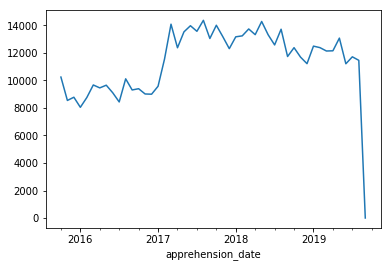

In [58]:
arrests.set_index('apprehension_date').resample('M')['id'].count().plot()

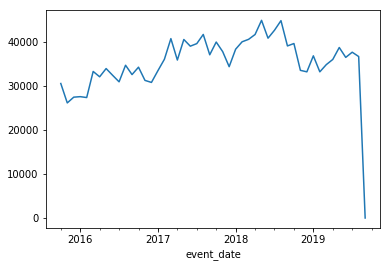

In [59]:
encounters.set_index('event_date').resample('M')['id'].count().plot()

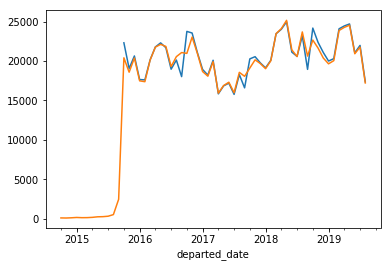

In [66]:
# Relationship between `removal_date` and `departed_date`. Strange.
removals.set_index('removal_date').resample('M')['id'].count().plot()
removals.set_index('departed_date').resample('M')['id'].count().plot()

In [14]:
facil_adp = pd.read_csv('../input/facility_adp_by_fy.csv', index_col=0)

In [15]:
facil_adp.head()

,ATL,BAL,BOS,BUF,CHI,DAL,DEN,DET,ELP,HOU,...,NYC,PHI,PHO,SEA,SFR,SLC,SNA,SND,SPM,WAS
FY09 ADP,2179,176,928,555,1200,851,643,722,1843,2274,...,968,1275,3103,1083,580,399,4799,1171,679,638
FY10 ADP,2244,232,864,545,1174,796,529,660,1826,2317,...,978,1276,2990,1213,636,415,4597,1154,703,577
FY11 ADP,2564,311,826,595,1521,861,528,709,1823,2161,...,987,1186,2872,1287,695,493,4614,1116,762,965
FY12 ADP,2539,348,858,484,1543,920,488,631,1707,2634,...,1003,1113,3026,1420,715,484,5647,1117,667,997
FY13 ADP,2287,320,739,440,1455,871,509,528,2019,3365,...,948,1066,3334,1436,846,444,6325,1136,460,895


In [26]:
# Percent change in ADP
(facil_adp.T['FY18 ADP'] - facil_adp.T['FY16 ADP']) / facil_adp.T['FY16 ADP'] * 100

ATL     65.924171
BAL     23.484848
BOS     38.378378
BUF      4.111842
CHI     13.161560
DAL     25.190011
DEN     31.643002
DET    110.964083
ELP      3.726205
HOU    -18.201285
LOS      4.526275
MIA      5.561224
NEW     -0.098522
NOL     11.907866
NYC     22.541278
PHI      6.771344
PHO     -7.264104
SEA     -0.584416
SFR      8.152735
SLC    -12.769784
SNA      5.881612
SND     10.993789
SPM     85.879630
WAS     17.824377
dtype: float64

In [34]:
# Total ADP % change
(facil_adp.T['FY18 ADP'].sum() - facil_adp.T['FY16 ADP'].sum()) / facil_adp.T['FY16 ADP'].sum() * 100

10.04292898319637

In [35]:
t = ['2008-10-01',
'2009-10-01',
'2010-10-01',
'2011-10-01',
'2012-10-01',
'2013-10-01',
'2014-10-01',
'2015-10-01',
'2016-10-01',
'2017-10-01']

In [36]:
facil_adp.index = t
facil_adp.index = pd.to_datetime(facil_adp.index)

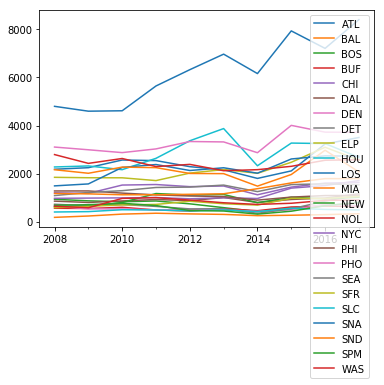

In [44]:
facil_adp.plot(stacked=False)

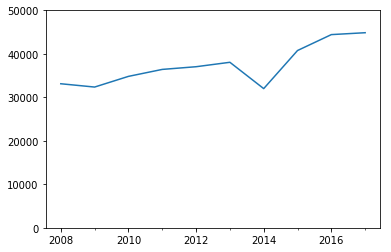

In [49]:
facil_adp.T.sum().plot(ylim=(0,50000))

In [148]:
facil_adp_subset = facil_adp.loc['2015':'2017']

In [127]:
arrests_by_aor_fy = arrests.set_index('apprehension_date').groupby([pd.Grouper(freq='AS-OCT'), 'aor'])['id'].count()

In [143]:
arrests_by_aor_fy = arrests_by_aor_fy.unstack()

In [154]:
arrests_by_aor_fy_subset = arrests_by_aor_fy.loc['2015':'2017']

In [155]:
arrests_by_aor_fy_subset.T/ facil_adp_subset.T

apprehension_date,2015-10-01 00:00:00,2016-10-01 00:00:00,2017-10-01 00:00:00
ATL,4.201896,4.192760,4.338475
BAL,4.693182,5.764706,5.223926
BOS,3.347748,4.229851,3.786458
BUF,1.929276,2.330733,2.499210
CHI,4.912953,5.370787,5.686769
DAL,10.460369,16.874362,15.302689
DEN,4.632860,3.808599,4.244992
DET,4.236295,4.010588,3.229391
ELP,0.652491,0.611506,0.843030
HOU,3.944937,4.176416,5.360135
